# __Importing Data Packages__

In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno

# Data preprocessing
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [13]:
# Reading dataset into DataFrame
raw_data = pd.read_csv('./Titanic-Dataset.csv')

In [14]:
# Top 5 rows
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
# Column names
raw_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [16]:
#Information about the dataset
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
# stats of the dataset
raw_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#  __Data Preprocessing__

In [18]:
data = raw_data.copy(deep=True)

In [19]:
# Splitting into different data types
numcols = data.select_dtypes(include=['int64', 'float64']).columns
objcols = data.select_dtypes(include=['object']).columns

## __Finding Unwanted Columns__

In [20]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [27]:
unwanted_columns = ['PassengerId', 'Name', 'Ticket', 'Cabin']

## __Finding Missing Values__

What is Missing Data?

    Missing data means absence of observations in columns. 
    It appears in values such as “0”, “NA”, “NaN”, “NULL”, “Not Applicable”, “None”.

Two ways to solve missing values. There are,
- Deletion
- Imputation

In [9]:
print("Missing values and their percentage: ")
for column in data.columns:
    if data[column].isnull().any():
        print(f'Column: {column} - Values: {data[column].isnull().sum()} - Percentage: {round((data[column].isnull().sum())/data.shape[0]*100)}% - Type: {data[column].dtype}')

Missing values and their percentage: 
Column: Age - Values: 177 - Percentage: 20% - Type: float64
Column: Cabin - Values: 687 - Percentage: 77% - Type: object
Column: Embarked - Values: 2 - Percentage: 0% - Type: object


## __Finding Duplicated Values__

In [12]:
if data.duplicated().any() is True:
    print(data.duplicated().sum())
else :
    print('There is no duplicated values present in this dataset.')

There is no duplicated values present in this dataset.


__There is no duplicated values.__

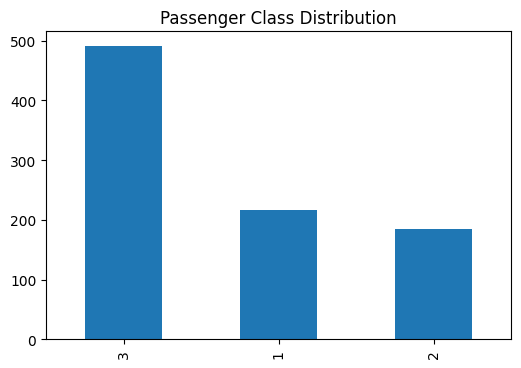

In [34]:
plt.figure(figsize=(6,4))
data['Pclass'].value_counts().plot(kind='bar')
plt.title('Passenger Class Distribution')
plt.show()

### using map and apply method to encoding categorical to numerical data

In [30]:
def gender_map(value):
    if value == 'male':
        return 0
    elif value == 'female':
        return 1
    else:
        return 2
    
data['Sex'].map(gender_map);
data['Sex'].apply(gender_map);


#### for a specific single column we can use LabelEncoder

In [31]:
from sklearn.preprocessing import LabelEncoder #only on series
encode = LabelEncoder()
data['Sex'] =  encode.fit_transform(data['Sex'].values)

In [32]:
# Splitting into different data types
numcol = data.select_dtypes(include=['int64', 'float64']).columns
objcol = data.select_dtypes(include=['object']).columns

#### for no. of categorical columns we can use OrdinalEncoder

In [33]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
data[objcol] = encoder.fit_transform(data[objcol])

In [34]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3.0,1,22.0,1.0,0.0,7.2500,2.0,0.0
1,1.0,0,38.0,1.0,0.0,71.2833,0.0,1.0
2,3.0,0,26.0,0.0,0.0,7.9250,2.0,1.0
3,1.0,0,35.0,1.0,0.0,53.1000,2.0,1.0
4,3.0,1,35.0,0.0,0.0,8.0500,2.0,0.0


## Splitting the data into features and target

In [35]:
features = data.drop(columns=['Survived'])
target = data['Survived']

## Scaling data

### Train and Test Split

In [56]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest= train_test_split(features, target, train_size=0.8, random_state = True)

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(xtrain)
xtrain = scale.transform(xtrain)
xtest = scale.transform(xtest)

In [57]:
print('xtrain shape: ', xtrain.shape)
print('xtest shape: ', xtest.shape)
print('ytrain shape: ', ytrain.shape)
print('ytest shape: ',ytest.shape)

xtrain shape:  (691, 7)
xtest shape:  (173, 7)
ytrain shape:  (691,)
ytest shape:  (173,)


In [66]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

def select_model_predict(model):

    # train the model
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)

    #Checking Bias Variance Tradeoff
    train_accuracy = model.score(xtrain, ytrain)
    test_accuracy = model.score(xtest, ytest)
    
    #Converting Accuracy score into dataframe
    dataframe = pd.DataFrame(
        [train_accuracy*100, test_accuracy*100], 
        index=['Train Accuracy', 'Test Accuracy'], 
        columns=['Value'])
    print(model)
    print(dataframe)
    
    # Classification Report for the model
    report = classification_report(ytest, ypred)
    print(report)
    
    return model

In [67]:
gnb = select_model_predict(GaussianNB())
mnb = select_model_predict(MultinomialNB())
bnb = select_model_predict(BernoulliNB())
knc = select_model_predict(KNeighborsClassifier())
logr = select_model_predict(LogisticRegression())

GaussianNB()
                    Value
Train Accuracy  78.581766
Test Accuracy   76.878613
              precision    recall  f1-score   support

         0.0       0.80      0.82      0.81       103
         1.0       0.72      0.70      0.71        70

    accuracy                           0.77       173
   macro avg       0.76      0.76      0.76       173
weighted avg       0.77      0.77      0.77       173

MultinomialNB()
                    Value
Train Accuracy  69.898698
Test Accuracy   65.317919
              precision    recall  f1-score   support

         0.0       0.67      0.81      0.73       103
         1.0       0.60      0.43      0.50        70

    accuracy                           0.65       173
   macro avg       0.64      0.62      0.62       173
weighted avg       0.64      0.65      0.64       173

BernoulliNB()
                    Value
Train Accuracy  79.160637
Test Accuracy   75.722543
              precision    recall  f1-score   support

         0.0  